In [1]:
import re
import os 
import pandas as pd 
import random
import numpy as  np
from lookup import dictionary

random.seed(42)
np.random.seed(42)

emojis = dictionary.index.tolist()

# Preprocess dataset for embedding collection

In [2]:
ROOT = "dataset"
dfs = []

for filename in os.listdir(ROOT):
    file_path = os.path.join(ROOT, filename)
    df = pd.read_csv(file_path, encoding='utf-8', delimiter='\\n', on_bad_lines='warn', names=['Text'])
    dfs.append(df)

full_df = pd.concat(dfs, ignore_index=True)

pd.set_option('display.max_colwidth', None)

full_df.shape

uniques = full_df.drop_duplicates()
uniques = uniques.dropna()

from lookup import root as d

for emoji in emojis:
    d[emoji]['dataset_count'] = len(uniques[uniques['Text'].str.contains(emoji)])

C:\Users\aless\AppData\Local\Temp\ipykernel_12720\1103800106.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, encoding='utf-8', delimiter='\\n', on_bad_lines='warn', names=['Text'])
C:\Users\aless\AppData\Local\Temp\ipykernel_12720\1103800106.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, encoding='utf-8', delimiter='\\n', on_bad_lines='warn', names=['Text'])
C:\Users\aless\AppData\Local\Temp\ipykernel_12720\1103800106.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separato

In [3]:
pattern = '|'.join(emojis)


df = uniques[uniques['Text'].str.contains(pattern, case=False, na=False)]

In [4]:
df

,Text
3,"🏆Airdrop Portal:👉 https://t.co/fudohu97uV"""
5,"For more tips and Strategies, follow me 👉 @coach_lawrence1 https://t.co/IvtL9Om86J"""
6,@occupied_9 @Rhiannon_clare_ @FightHaven Thanks for the update the sh*t country the sh*t police 👉💩😡
7,"""Hungry for active mutuals👬👭? Follow fastest Retweeters🔁 now💯✅"
11,👉 https://t.co/aHulc12YTO
...,...
1399441,@ChiSoxFanMike 🙏🏼😉
1399442,@VP Wow! You sooo good at ignoring the obvious 🙄 https://t.co/rOghYYX1jO
1399443,@jayem1978 @Devin_Heroux You can always count on Devin to make sure we know ALL of the technical &amp; important curling terms 😉
1399444,@christinalest1 @Make70sGreat Here we go😉😬


In [4]:
def extract_tags(text):
    pattern = r'@\w+'
    
    # Find all matches of the pattern in the text
    text = re.sub(pattern, '[TAG]', text)
    
    return text

def extract_links(text):

    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Find all matches of the pattern in the text
    text = re.sub(pattern, '[LINK]', text)
    
    return text

df['Text'] = df['Text'].apply(extract_tags)
df['Text'] = df['Text'].apply(extract_links)

C:\Users\aless\AppData\Local\Temp\ipykernel_12720\3731807862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(extract_tags)
C:\Users\aless\AppData\Local\Temp\ipykernel_12720\3731807862.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(extract_links)


In [6]:
df

,Text
3,🏆Airdrop Portal:👉 [LINK]
5,"For more tips and Strategies, follow me 👉 [TAG] [LINK]"
6,[TAG] [TAG] [TAG] Thanks for the update the sh*t country the sh*t police 👉💩😡
7,"""Hungry for active mutuals👬👭? Follow fastest Retweeters🔁 now💯✅"
11,👉 [LINK]
...,...
1399441,[TAG] 🙏🏼😉
1399442,[TAG] Wow! You sooo good at ignoring the obvious 🙄 [LINK]
1399443,[TAG] [TAG] You can always count on Devin to make sure we know ALL of the technical &amp; important curling terms 😉
1399444,[TAG] [TAG] Here we go😉😬


In [5]:
import emoji

def extract_words_and_emojis(text):

    pattern = r'[!"#$%&\'\"()*+,-./;<=>?@[\\]^_`{|}~]'
    text = text.lower() # hey! let me tell about python: it is 👍
    text = emoji.demojize(text) # hey! let me tell about python: it is :thumbs_up:
    text = re.sub(pattern, '', text) # hey let me tell about python: it is :thumbs_up:
    text = emoji.emojize(text) # hey let me tell about python: it is 👍
    text = text.replace(':', '') # hey let me tell about python: it is 👍

    return text

df['Text'] = df['Text'].apply(extract_words_and_emojis)

C:\Users\aless\AppData\Local\Temp\ipykernel_12720\1537860002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(extract_words_and_emojis)


In [8]:
df

,Text
3,🏆airdrop portal👉 [link]
5,"for more tips and strategies, follow me 👉 [tag] [link]"
6,[tag] [tag] [tag] thanks for the update the sh*t country the sh*t police 👉💩😡
7,"""hungry for active mutuals👬👭? follow fastest retweeters🔁 now💯✅"
11,👉 [link]
...,...
1399441,[tag] 🙏🏼😉
1399442,[tag] wow! you sooo good at ignoring the obvious 🙄 [link]
1399443,[tag] [tag] you can always count on devin to make sure we know all of the technical &amp; important curling terms 😉
1399444,[tag] [tag] here we go😉😬


In [6]:
def drop_hashtags(text):
    text = text.replace('#', '')
    return text

df['Text'] = df['Text'].apply(drop_hashtags)

C:\Users\aless\AppData\Local\Temp\ipykernel_12720\1687641976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(drop_hashtags)


In [7]:
df.reset_index(drop=True, inplace=True)
df.index += 1
df[0:40]

,Text
1,🏆airdrop portal👉 [link]
2,"for more tips and strategies, follow me 👉 [tag] [link]"
3,[tag] [tag] [tag] thanks for the update the sh*t country the sh*t police 👉💩😡
4,"""hungry for active mutuals👬👭? follow fastest retweeters🔁 now💯✅"
5,👉 [link]
6,👉[link]
7,👉[link]
8,👉[link] [link]
9,"""so cute ❤️"
10,"🔸 for more inspiration and uplifting stories, please follow 👉 [tag] [link]"


In [11]:
df

,Text
1,🏆airdrop portal👉 [link]
2,"for more tips and strategies, follow me 👉 [tag] [link]"
3,[tag] [tag] [tag] thanks for the update the sh*t country the sh*t police 👉💩😡
4,"""hungry for active mutuals👬👭? follow fastest retweeters🔁 now💯✅"
5,👉 [link]
...,...
674308,[tag] 🙏🏼😉
674309,[tag] wow! you sooo good at ignoring the obvious 🙄 [link]
674310,[tag] [tag] you can always count on devin to make sure we know all of the technical &amp; important curling terms 😉
674311,[tag] [tag] here we go😉😬


In [12]:
print(len(uniques))
print(len(df))
df

1235925
674312


,Text
1,🏆airdrop portal👉 [link]
2,"for more tips and strategies, follow me 👉 [tag] [link]"
3,[tag] [tag] [tag] thanks for the update the sh*t country the sh*t police 👉💩😡
4,"""hungry for active mutuals👬👭? follow fastest retweeters🔁 now💯✅"
5,👉 [link]
...,...
674308,[tag] 🙏🏼😉
674309,[tag] wow! you sooo good at ignoring the obvious 🙄 [link]
674310,[tag] [tag] you can always count on devin to make sure we know all of the technical &amp; important curling terms 😉
674311,[tag] [tag] here we go😉😬


In [8]:
for emoji in emojis:
    d[emoji]['dataset_count'] = len(df[df['Text'].str.contains(emoji)])

for index, (key, value) in enumerate(d.items()):
    d[key]['freq_rank'] = index+1


In [14]:
d

{'😂': {'name': 'lol',
  'unicode': 'U0001F602',
  'visual_features': None,
  'embedding': None,
  'mixed_features': None,
  'dataset_count': 54433,
  'freq_rank': 1},
 '❤️': {'name': 'red-heart',
  'unicode': 'U00002764',
  'visual_features': None,
  'embedding': None,
  'mixed_features': None,
  'dataset_count': 46158,
  'freq_rank': 2},
 '🤣': {'name': 'rofl',
  'unicode': 'U0001F923',
  'visual_features': None,
  'embedding': None,
  'mixed_features': None,
  'dataset_count': 40524,
  'freq_rank': 3},
 '👍': {'name': 'thumbs-up',
  'unicode': 'U0001F44D',
  'visual_features': None,
  'embedding': None,
  'mixed_features': None,
  'dataset_count': 27457,
  'freq_rank': 4},
 '😭': {'name': 'crying-face',
  'unicode': 'U0001F62D',
  'visual_features': None,
  'embedding': None,
  'mixed_features': None,
  'dataset_count': 49270,
  'freq_rank': 5},
 '🙏': {'name': 'amen',
  'unicode': 'U0001F64F',
  'visual_features': None,
  'embedding': None,
  'mixed_features': None,
  'dataset_count': 3

# Dictionary to df: we will store here our embeddings

In [9]:
dictionary = pd.DataFrame(d).T
dictionary.sort_values(by='dataset_count', ascending=True)

,name,unicode,visual_features,embedding,mixed_features,dataset_count,freq_rank
💅,nails,U0001F485,None,None,None,604,90
🏃,running-man,U0001F3C3,None,None,None,674,76
🤓,glasses,U0001F913,None,None,None,737,87
🔴,red-dot,U0001F534,None,None,None,932,73
🌿,branch,U0001F33F,None,None,None,993,92
...,...,...,...,...,...,...,...
🙏,amen,U0001F64F,None,None,None,36078,6
🤣,rofl,U0001F923,None,None,None,40524,3
❤️,red-heart,U00002764,None,None,None,46158,2
😭,crying-face,U0001F62D,None,None,None,49270,5


In [10]:
# import json 

# with open("lookup.json", 'w') as json_file:
#     json.dump(d, json_file, indent=4)

# dictionary = pd.read_json("lookup.json").T

dictionary = dictionary.sort_values(by='dataset_count', ascending=False)
dictionary
sample_bias = [(i - dictionary['freq_rank'][idx]) for idx, i in enumerate(range(1, len(dictionary['freq_rank']) + 1))]
dictionary['sample_bias'] = sample_bias

In [11]:
dictionary = dictionary.sort_values(by='sample_bias', ascending=False)
dictionary[-10:]

,name,unicode,visual_features,embedding,mixed_features,dataset_count,freq_rank,sample_bias
😡,rage,U0001F621,None,None,None,20656,43,-21
👀,eyes,U0001F440,None,None,None,23623,36,-22
☀️,sun,U00002600,None,None,None,17254,60,-35
💀,og,U0001F480,None,None,None,22896,50,-35
☕,coffee,U00002615,None,None,None,4688,78,-38
💩,bozhi,U0001F4A9,None,None,None,19815,67,-44
🖕,fuck-you,U0001F595,None,None,None,17227,72,-46
✅,good,U00002705,None,None,None,26743,68,-57
🤡,clown,U0001F921,None,None,None,22294,86,-69
🐰,bunny,U0001F430,None,None,None,35253,83,-77


In [19]:
# Top 10 Over-represented: bunny, clown, good, fuck-you, bozhi, coffee, og, sun, eyes, rage  

# Top 10 Under-represented: tear, smile, bit-sad, facepalm, monkey-eyes, ehh, dunno, balloon, blowing-kiss, omg

# Top 10 absolute bias: bunny, clown, good, fuck-you, bozhi, coffee, tear, og, sun, smile

In [12]:
from embeddings import extract_embeddings 

embedding_list = extract_embeddings(df, emojis)

for emoji, embedding in embedding_list:
    dictionary.at[emoji, 'embedding'] = embedding

# Analysis (embeddings)

In [22]:
from sklearn.manifold import TSNE
import numpy as np

X = dictionary['embedding'].tolist()
X = np.array(X)

n_samples, n_features = X.shape

print(X.shape)

X = X.reshape(n_samples, -1)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'])

(94, 100)


In [23]:
df_tsne['emoji_name'] = dictionary['name'].tolist()
df_tsne['emoji'] = dictionary.index

In [24]:
df_tsne

,tsne_feature1,tsne_feature2,emoji_name,emoji
0,-32.252514,-23.099787,tear,😢
1,-8.017724,14.104092,smile,🙂
2,-31.006910,-19.505688,bit-sad,😔
3,-21.099957,5.284032,facepalm,🤦
4,-14.534472,13.291251,monkey-eyes,🙈
...,...,...,...,...
89,-41.944866,8.484762,bozhi,💩
90,-37.553631,6.924809,fuck-you,🖕
91,27.508930,16.644867,good,✅
92,-39.755444,7.313528,clown,🤡


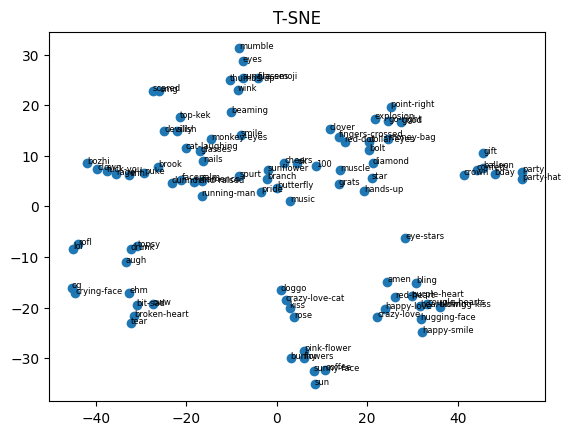

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df_tsne['tsne_feature1'], df_tsne['tsne_feature2'], label=df_tsne['emoji_name'])

# Set labels and title
plt.title('T-SNE')

for i, txt in enumerate(df_tsne['emoji_name']):
    plt.annotate(txt, (df_tsne['tsne_feature1'][i], df_tsne['tsne_feature2'][i]), fontsize=6)


plt.show()


# Pass the dictionary to image model

In [32]:
dictionary

,name,unicode,visual_features,embedding,mixed_features,dataset_count,freq_rank,sample_bias
😢,tear,U0001F622,None,"[0.11929614, -0.285868, 1.040483, 1.19235, 0.78374535, -0.6883695, -0.28053385, 0.6704113, 0.3227455, -0.80097324, -0.38779983, -0.86636746, 0.1015698, -0.5665577, 0.572981, 1.0920684, 0.6467497, -0.092036396, -0.47598156, 0.02555903, -0.05883494, 0.6285426, -0.7141991, 0.35579008, -1.0909731, -0.17622729, 0.35232615, -0.30685902, -1.6106032, 0.59001124, 0.7319226, -0.04233275, -0.1258978, -0.2800002, 0.5510055, -0.5074149, -0.94269025, -1.4827242, -0.5935043, -0.2592849, -0.903912, -0.7880157, -0.24783234, 0.85323566, -1.1900257, -1.6182177, -0.7027507, -0.70490664, 0.34579265, -1.1148509, -0.045615017, -0.8564674, 1.06131, -0.13059981, -0.4634928, -0.80081356, -0.20747845, 0.6279085, 0.6773281, 0.01865753, 0.49743426, 1.2122339, 0.18590537, -0.7318027, -1.1829816, 0.16207261, -0.5276531, 0.98245955, 0.67036116, -0.17959505, -0.36222902, 1.2454325, 0.3206925, 0.6782193, 0.27655816, -0.26617014, -0.7217305, -0.22088568, 1.2153428, -1.1554774, 0.003170581, -0.38837928, 0.43180034, -0.03675807, -1.8115208, 0.6576351, -0.2245756, 0.5320259, 0.50055224, 1.1424556, 0.15685858, 0.11838977, -0.8461426, 0.8489334, -1.416918, 0.9401417, -0.13903199, 0.119781286, -0.33115172, -0.8227837]",None,1460,37,38
🙂,smile,U0001F642,None,"[0.393292, 0.15503871, 0.5939013, 1.2343796, 0.71739274, 1.2552439, -0.655127, 1.5539846, -0.44158235, 1.7537509, -0.54664, -1.2161819, 0.2077907, 0.41857487, 1.4059145, -0.8400587, -1.7125632, 0.8616258, 0.004172351, 0.3183279, -0.46170574, 0.8074373, -0.41499898, -0.021738129, -0.1292133, 0.2863801, -0.68388605, -0.11994538, -0.18490914, -1.1742133, -1.6487285, 0.043423407, -2.1232936, -0.06518345, -0.08038083, -0.9443617, 0.36743554, -0.93815655, -0.392591, 1.5197195, -0.13648675, -0.8863887, -0.0581719, 0.7424212, 0.53274375, 0.33755577, 0.5972303, -0.12514684, -0.023748279, 0.53875047, -2.2237701, -2.5138066, 0.07800005, -0.339333, 1.1437927, 0.62403446, -0.21723731, 0.5450818, 1.4057294, -0.4180797, -0.19704697, -0.846499, 1.7526822, -0.21563548, -0.06615624, -0.7667415, 0.42012691, -0.077058, 0.3870063, -0.48702973, -0.28103203, 2.6322956, 0.62805724, 1.3839765, -1.9246737, 0.5188908, -0.5108781, 0.11856227, 0.24193665, -1.4971831, -0.023600742, 0.1221232, 1.0176697, -0.62573665, -0.7267339, -0.99004114, 0.014002478, 0.600983, -1.072414, 1.7539811, -0.85907173, 0.18114379, 1.128719, 1.9510394, -0.24258932, 0.66428614, -0.20564227, -0.7890244, 0.042139992, -0.065871656]",None,2238,26,34
😔,bit-sad,U0001F614,None,"[0.04088688, -0.46497685, 0.8481318, 2.1277804, 0.35724786, -0.8277619, 0.6817874, 1.6424367, 0.3550535, -1.2543153, 0.3982209, -1.4885694, -0.7050287, -1.6336887, -0.967709, 0.5166396, 0.53034365, -1.1256988, -1.441758, -1.3947061, 1.0821851, 0.9064715, -1.1025184, 0.3168333, -0.7982287, 0.6001971, -0.080890685, -0.6481763, -1.8438286, 0.9973482, 0.36584795, -0.3811743, 0.03700494, -0.5684968, 0.85652936, 0.16464253, -0.3714454, -1.447554, -0.80301523, -1.16574, -1.5181092, -0.512374, -0.66198075, 1.029934, -1.0422697, -1.98064, -0.45336714, -0.6774723, -0.20752591, -2.2601717, -1.0281165, -1.7697872, 0.53454775, -0.148437, 0.05582582, -0.80739987, -0.9353853, 0.7699728, 1.0458496, -1.3167331, 0.22648823, 0.9593165, -0.33929965, -0.22476958, -1.2353085, 1.0678247, -0.98809236, 0.48508346, 0.5734337, -2.4726422, 1.1099249, 0.88765216, -0.6805042, 0.5462311, -0.018082658, 0.3037381, -1.5618242, -1.4769653, 1.0844388, -1.0465676, -0.10870406, 0.8262708, -0.24428017, -0.551475, -3.0003874, -0.30213133, -0.548156, 0.88485533, -0.23799533, 1.6476271, 0.61839825, -0.2784334, -2.039522, 1.3630754, -1.0598569, 0.8484074, -0.74917287, 0.09317212, -0.055137657, -1.2163656]",None,2121,32,33
🤦,facepalm,U0001F926,None,"[0.31041855, -0.11638497, -0.2971154, 0.26912072, -0.19846839, -0.1409914, 0.2488358, 0.3561548, -0.046767004, 0.09417985, -0.5752271, -0.022736035, 0.4190892, -0.38072887, 0.07941978,

In [33]:
json_dictionary = dictionary.to_json(orient='split')

with open("dictionary-text-1.json", 'w') as json_file:
    json_file.write(json_dictionary)


In [30]:
with open('dictionary-text-1.json', 'r') as json_file:
    json_content = json_file.read()
    new_dict = pd.read_json(json_content, orient='split')

new_dict

,name,unicode,visual_features,embedding,mixed_features,dataset_count,freq_rank,sample_bias
😢,tear,U0001F622,NaN,"[0.11929614100000001, -0.2858679891, 1.0404829979, 1.1923500299, 0.7837453485, -0.6883695126, -0.2805338502, 0.6704112887, 0.322745502, -0.8009732366000001, -0.3877998292, -0.8663674593, 0.10156980160000001, -0.5665577054000001, 0.5729809999000001, 1.0920684338, 0.6467496753, -0.0920363963, -0.4759815633, 0.0255590305, -0.058834940200000005, 0.6285426021, -0.7141991258, 0.3557900786, -1.0909731388, -0.1762272865, 0.3523261547, -0.3068590164, -1.6106032133000001, 0.5900112391, 0.7319226265000001, -0.0423327498, -0.125897795, -0.2800002098, 0.5510054827, -0.5074148774, -0.9426902533, -1.4827241898, -0.5935043097, -0.2592849135, -0.9039120078, -0.7880157232, -0.247832343, 0.853235662, -1.1900256872, -1.6182177066999999, -0.7027506828, -0.7049066424, 0.3457926512, -1.1148508787, -0.0456150174, -0.8564674258, 1.0613100529, -0.1305998117, -0.46349281070000004, -0.8008135557, -0.2074784487, 0.6279085279000001, 0.6773281097, 0.0186575297, 0.4974342585, 1.212233901, 0.1859053671, -0.7318027020000001, -1.1829816103, 0.16207261380000001, -0.5276530981, 0.9824595451, 0.6703611612, -0.1795950532, -0.3622290194, 1.2454324961, 0.3206925094, 0.6782193184, 0.2765581608, -0.2661701441, -0.7217304707000001, -0.2208856791, 1.2153427601, -1.1554774046, 0.0031705811, -0.38837927580000003, 0.43180033560000003, -0.0367580689, -1.8115208149000002, 0.6576350927, -0.2245755941, 0.5320258737, 0.5005522370000001, 1.1424555779, 0.1568585783, 0.11838977040000001, -0.84614259, 0.8489333987000001, -1.4169180393, 0.9401416779, -0.1390319914, 0.1197812855, -0.33115172390000003, -0.8227837086]",NaN,1460,37,38
🙂,smile,U0001F642,NaN,"[0.3932920098, 0.1550387144, 0.5939012766, 1.2343796492, 0.7173927426000001, 1.2552438974, -0.6551269889, 1.553984642, -0.4415823519, 1.7537509203, -0.5466399789, -1.2161818743000001, 0.20779070260000002, 0.4185748696, 1.4059145451, -0.8400586843000001, -1.7125631571, 0.8616257906, 0.0041723512, 0.3183279037, -0.4617057443, 0.8074373007000001, -0.4149989784, -0.0217381287, -0.1292133033, 0.28638011220000004, -0.6838860512, -0.1199453771, -0.1849091351, -1.1742132902, -1.6487284898999999, 0.0434234068, -2.1232936382, -0.0651834533, -0.0803808272, -0.9443616867, 0.3674355447, -0.9381565452, -0.3925909996, 1.5197194815000001, -0.1364867538, -0.8863887191, -0.0581719019, 0.7424212098, 0.532743752, 0.3375557661, 0.5972303152, -0.125146836, -0.023748278600000002, 0.5387504697000001, -2.2237701416, -2.5138065815, 0.0780000463, -0.33933299780000004, 1.1437927485000001, 0.6240344644, -0.2172373086, 0.5450817943, 1.405729413, -0.41807970400000005, -0.1970469654, -0.8464990258, 1.752682209, -0.2156354785, -0.0661562383, -0.7667415142, 0.42012691500000005, -0.0770580024, 0.3870063126, -0.4870297313, -0.28103202580000003, 2.6322956084999998, 0.6280572414000001, 1.3839764595, -1.9246736764999999, 0.5188907981, -0.5108780861000001, 0.1185622737, 0.24193665390000002, -1.4971830845, -0.0236007422, 0.1221231967, 1.0176696777, -0.6257366538, -0.7267339230000001, -0.9900411367, 0.014002477800000001, 0.6009830236, -1.0724140406, 1.7539811134, -0.8590717316, 0.1811437905, 1.1287189722, 1.9510394335, -0.2425893247, 0.6642861366, -0.2056422681, -0.7890244126, 0.0421399921, -0.0658716559]",NaN,2238,26,34
😔,bit-sad,U0001F614,NaN,"[0.040886879, -0.46497684720000004, 0.8481317759, 2.1277804375000002, 0.3572478592, -0.8277618885, 0.6817873716, 1.6424367428000002, 0.35505351420000003, -1.2543152571, 0.3982208967, -1.4885693789, -0.7050287127, -1.6336886883, -0.9677090049, 0.5166395903000001, 0.5303436518, -1.1256988049, -1.4417580366, -1.3947061299999999, 1.0821851492, 0.9064714909, -1.1025184393, 0.3168332875, -0.7982286811, 0.6001970768, -0.0808906853, -0.6481763124000001, -1.8438285589, 0.9973481894, 0.3658479452, -0.38117429610000003, 0.0370049402, -0.5684968233000001, 0.856529355, 0.1646425277, -0.3714453876, -1.4475539923, -0.8030152321, -1.165740